Column
* Person ID: An identifier for each individual.
* Gender: The gender of the person (Male/Female).
* Age: The age of the person in years.
* Occupation: The occupation or profession of the person.
* Sleep Duration (hours): The number of hours the person sleeps per day.
* Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
* Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
* Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
* BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
* Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
* Heart Rate (bpm): The resting heart rate of the person in beats per minute.
* Daily Steps: The number of steps the person takes per day.
* Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [2]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns 
import plotly.express as px
from termcolor import colored
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')
data.head().style.set_properties(**{'background-color': '#3a9fcf', 'color': '#edf6fa'})  #hex color 

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.100000,6,42,6,Overweight,126/83,77,4200,nan
1,2,Male,28,Doctor,6.200000,6,60,8,Normal,125/80,75,10000,nan
2,3,Male,28,Doctor,6.200000,6,60,8,Normal,125/80,75,10000,nan
3,4,Male,28,Sales Representative,5.900000,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.900000,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
data.shape

(374, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
#replace nan with None (represent normal)
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('None')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
#Choosing Colormaps in Matplotlib (https://matplotlib.org/stable/users/explain/colors/colormaps.html)
data.describe().style.background_gradient(cmap='PuBu')

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
#info for string values
data.describe(include='O').style.set_properties(**{'background-color': '#35f271', 'color': '#1e1f1e'}) 

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,None
freq,189,73,195,99,219


## Exploratory Data Analysis (EDA) -- visualization

In [9]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [10]:
data.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

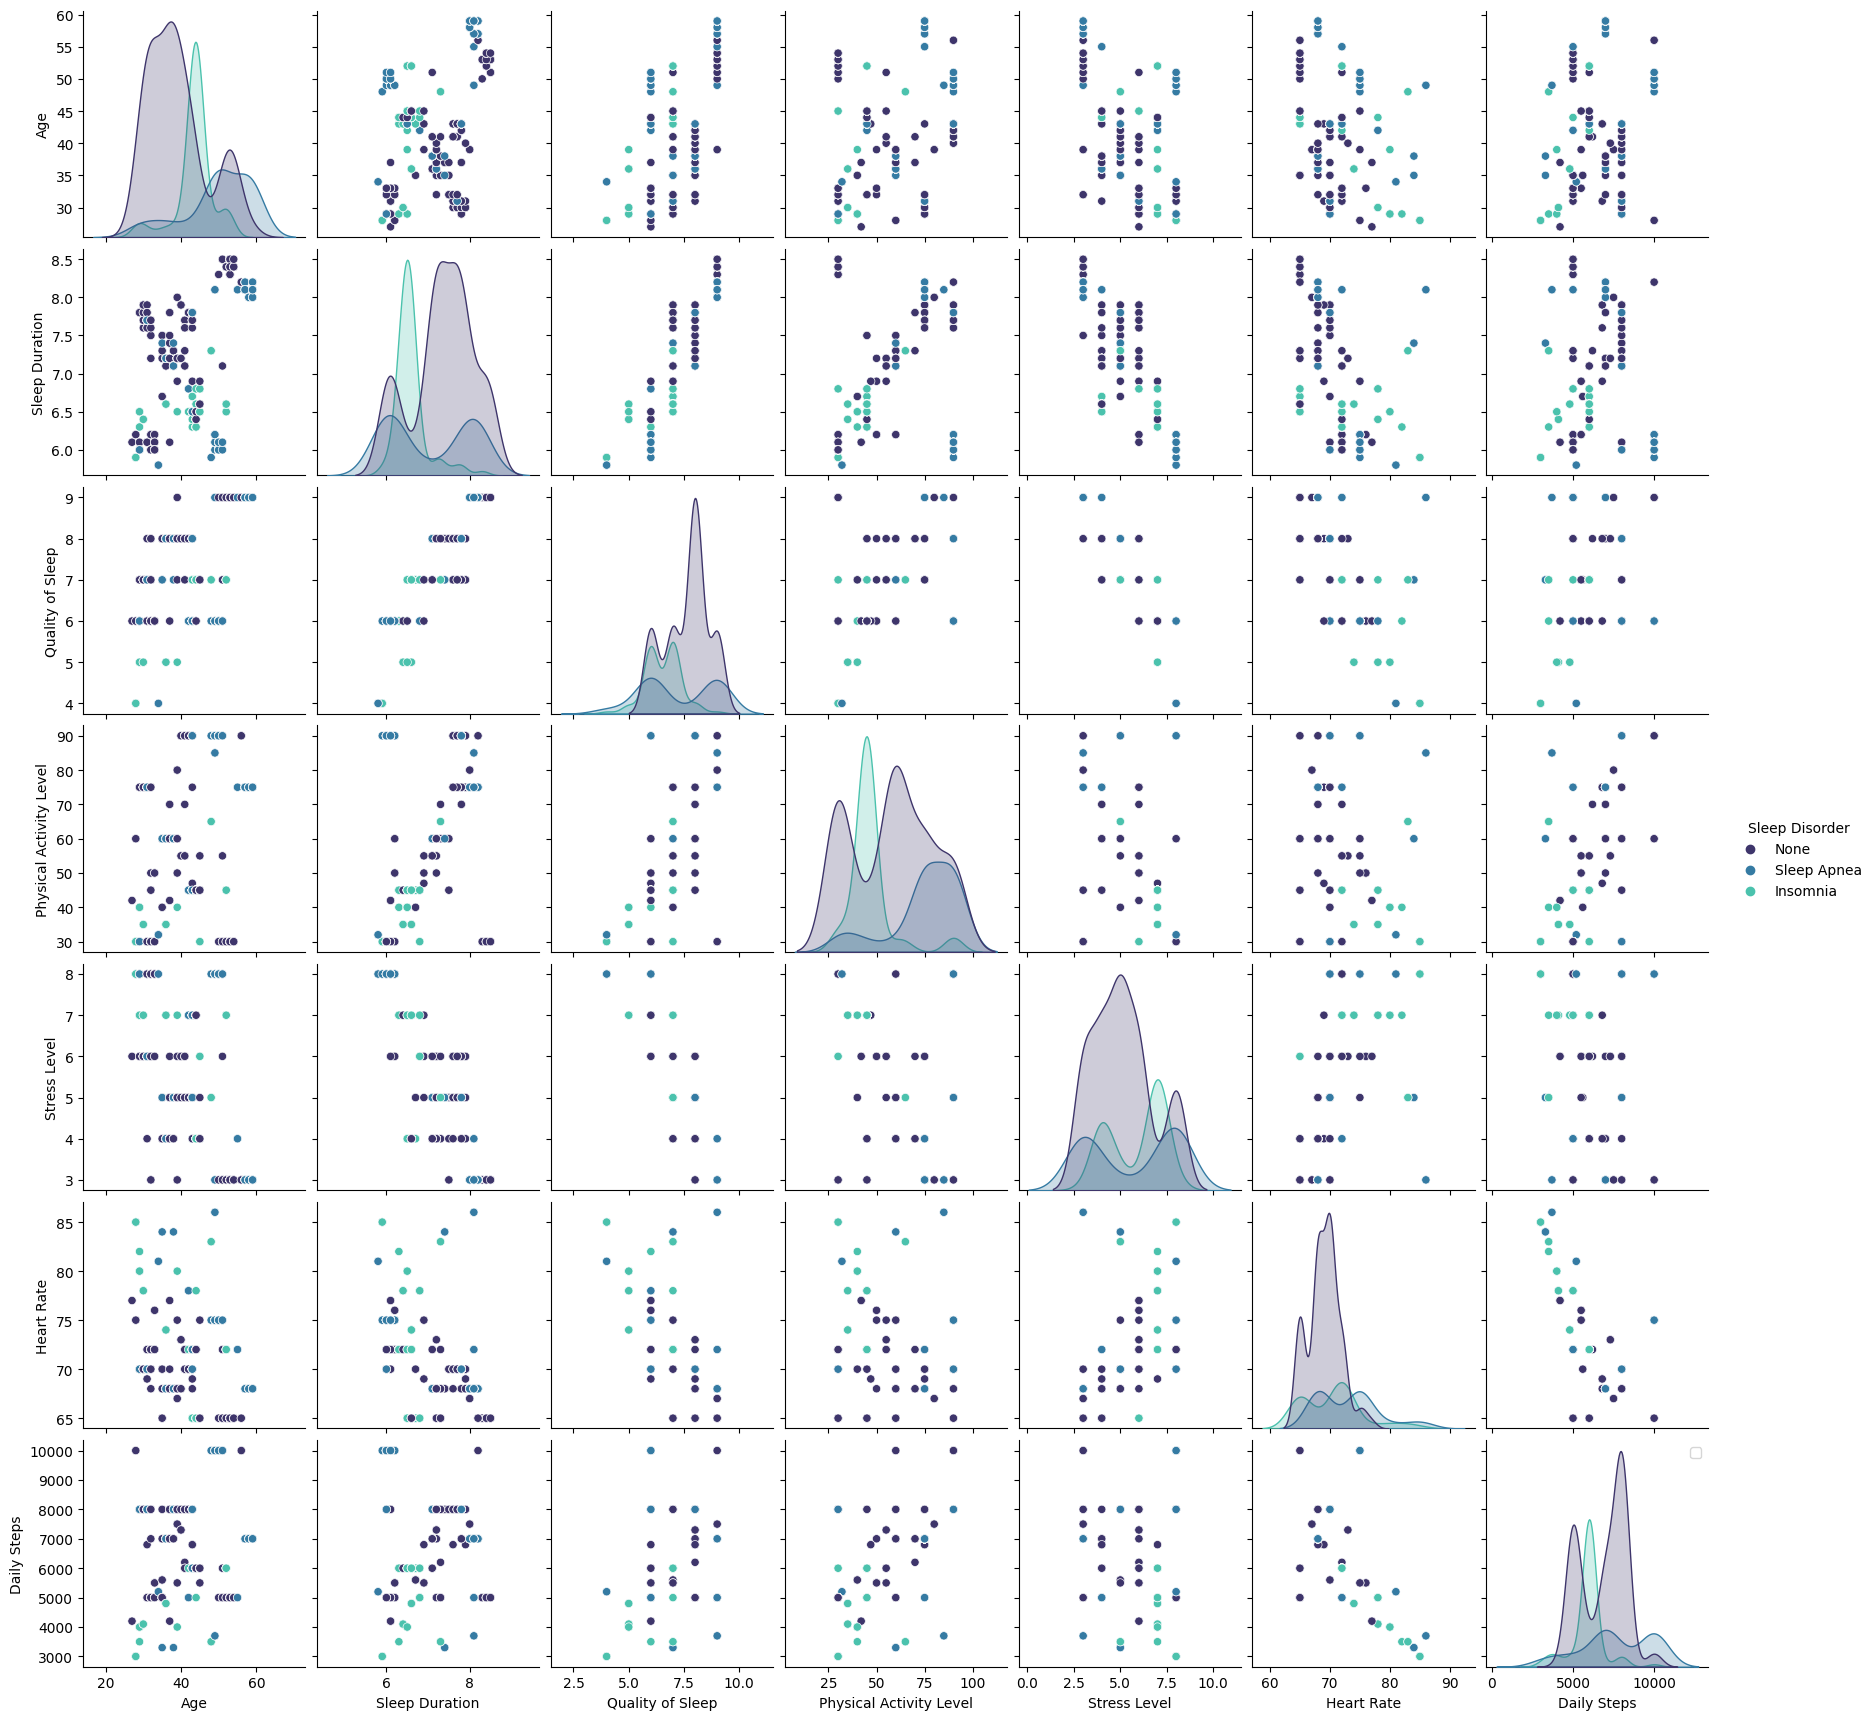

In [11]:
# plt.style.use('seaborn-white')
sns.pairplot(data.drop('Person ID',axis=1), hue='Sleep Disorder', palette='mako')
plt.legend()
plt.show()

In [12]:
#Percentage of persons have sleep disorder or not
data['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [13]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

**People who don't have sleep problem is more...**


In [14]:
fig = px.histogram(data, x='Sleep Disorder', 
                 barmode="group", color='Sleep Disorder',
                 color_discrete_sequence=['white','#4A235A','#C39BD3'],
                 text_auto=True)
 
    
fig.update_layout(title='<b>Sleep disorder or not distribution</b>',
                 title_font={'size':25},
                 title_x=0.5,    #標題置中
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0',
                 showlegend=True)


fig.update_yaxes(showgrid=False)

fig.show()

In [15]:
data.groupby('Sleep Disorder')['Gender'].value_counts()

Sleep Disorder  Gender
Insomnia        Male       41
                Female     36
None            Male      137
                Female     82
Sleep Apnea     Female     67
                Male       11
Name: count, dtype: int64

- Normal : male > femle
- Insomnia : male > female
- Sleep Apnea : female > male

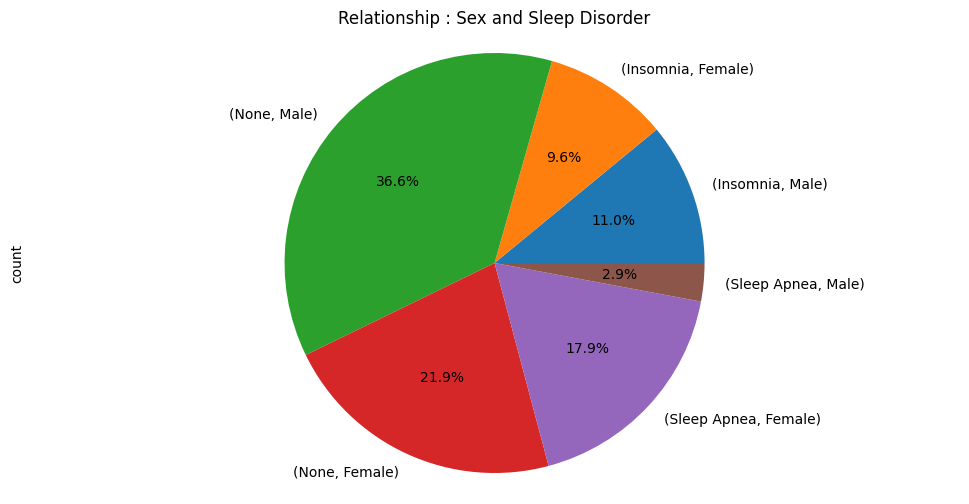

In [21]:
data.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct ='%1.1f%%', figsize=(12,6))  # %.1f%% : 顯示小數點一位的浮點數，後方加上百分比符號
plt.title('Relationship : Sex and Sleep Disorder')
plt.axis('equal')  #x和y軸的單位一樣
plt.show()

In [29]:
jobs = colored(data['Occupation'].unique(), "red", None, attrs=["blink"])
print(jobs)

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


In [30]:
data.groupby('Sleep Disorder')['Occupation'].value_counts()

Sleep Disorder  Occupation          
Insomnia        Salesperson             29
                Teacher                 27
                Accountant               7
                Engineer                 5
                Doctor                   3
                Nurse                    3
                Lawyer                   2
                Software Engineer        1
None            Doctor                  64
                Engineer                57
                Lawyer                  42
                Accountant              30
                Nurse                    9
                Teacher                  9
                Software Engineer        3
                Salesperson              2
                Scientist                2
                Manager                  1
Sleep Apnea     Nurse                   61
                Doctor                   4
                Teacher                  4
                Lawyer                   3
                S

In [32]:
fig = px.treemap(data, path=[px.Constant('Jobs'),'Sleep Disorder','Occupation'], color='Sleep Disorder')
fig.update_layout(title='<b>The effect of job on sleep</b>..', title_font={'size':20}, title_x=0.5)
fig.show()

In [37]:
data.pivot_table(index='Quality of Sleep',columns='Sleep Disorder',values='Sleep Duration',aggfunc='mean').style.background_gradient(cmap='PuBu')

Sleep Disorder,Insomnia,None,Sleep Apnea
Quality of Sleep,,,
4,5.900000,nan,5.850000
5,6.500000,nan,6.500000
6,6.371875,6.117500,6.118182
7,6.638235,7.540000,7.500000
8,7.520000,7.399010,7.366667
9,8.300000,8.365789,8.096875


In [41]:
fig=px.sunburst(data, path=[px.Constant('Sleep quality'),'Sleep Disorder','Quality of Sleep'],
               color='Sleep Disorder',values='Sleep Duration',
              color_discrete_sequence=['pink','#4A235A','#FFF3FD'],
              hover_data=['Gender'])

fig.update_layout(title='<b>The effect of quality of sleep on sleep </b>',
                 title_font={'size':20}, title_x=0.5)

fig.show()

In [42]:
fig = px.violin(data, x="Sleep Disorder",y='Physical Activity Level',
                 color='Sleep Disorder',
                 color_discrete_sequence=['white','#4A235A','#C39BD3'],
                 violinmode='overlay')
               
    
fig.update_layout(title='<b>The effect of activities on sleep </b>',
                 title_font={'size':20}, title_x=0.5,
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0')

fig.update_yaxes(showgrid=False)
fig.show()

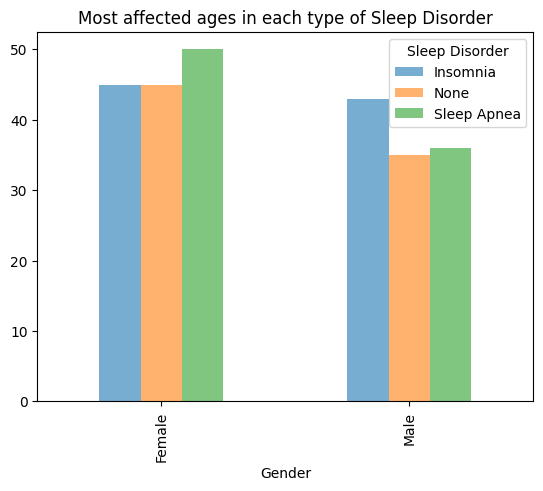

In [47]:
data.pivot_table(index='Gender',columns='Sleep Disorder',values='Age',aggfunc='median'
                ).plot(kind='bar', title='Most affected ages in each type of Sleep Disorder',
                       label='Age',alpha=.6)


plt.show()


In [53]:
fig=px.ecdf(data,x='Age', color='Sleep Disorder')

fig.update_layout(title='<b>The effect of ages on sleep </b>',
                 title_font={'size':20}, title_x=0.5,
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0')


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [54]:
fig=px.histogram(data, x='Sleep Disorder',y='Sleep Duration',
                 color='Sleep Disorder',color_discrete_sequence=['white','#4A235A','#C39BD3'],
                 text_auto=True)



fig.update_layout(title='<b>The effect of Sleep Duration on Sleep Disorder</b> ..',
                  titlefont={'size': 20,'family': 'Serif'},title_x=0.5,
                  showlegend=True, 
                  paper_bgcolor='#EBDEF0',
                  plot_bgcolor='#EBDEF0')

fig.update_yaxes(showgrid=False)
fig.show()

In [56]:
fig=px.scatter_3d(data, x='BMI Category',y='Blood Pressure',z='Heart Rate',
                  color='Sleep Disorder',width=1000,height=900)


fig.update_layout(title='<b>The relationship between (BMI Category, Blood Pressure and Heart Rate) and Sleep Disorder</b> ',
                  titlefont={'size': 18}, showlegend=True)

fig.show()

In [58]:
data.pivot_table(index='Stress Level', columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}
                ).style.background_gradient(cmap='Oranges')

In [60]:
fig=px.histogram(data,x='Sleep Disorder',
                 color='Sleep Disorder',
                 facet_col='Stress Level',
                 barmode='group',
                 color_discrete_sequence=['white','#4A235A','#C39BD3'],
                 opacity=.7)


fig.update_layout(title='<b>Stress Level vs. Sleep Disorder</b> ',title_font={'size':20}, title_x=.5,
                  paper_bgcolor='#EBDEF0',
                  plot_bgcolor='#EBDEF0')



fig.update_yaxes(showgrid=False)
fig.show()

In [64]:
data['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [65]:
data.pivot_table(index='BMI Category',columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}
                ).style.background_gradient(cmap='Greens')

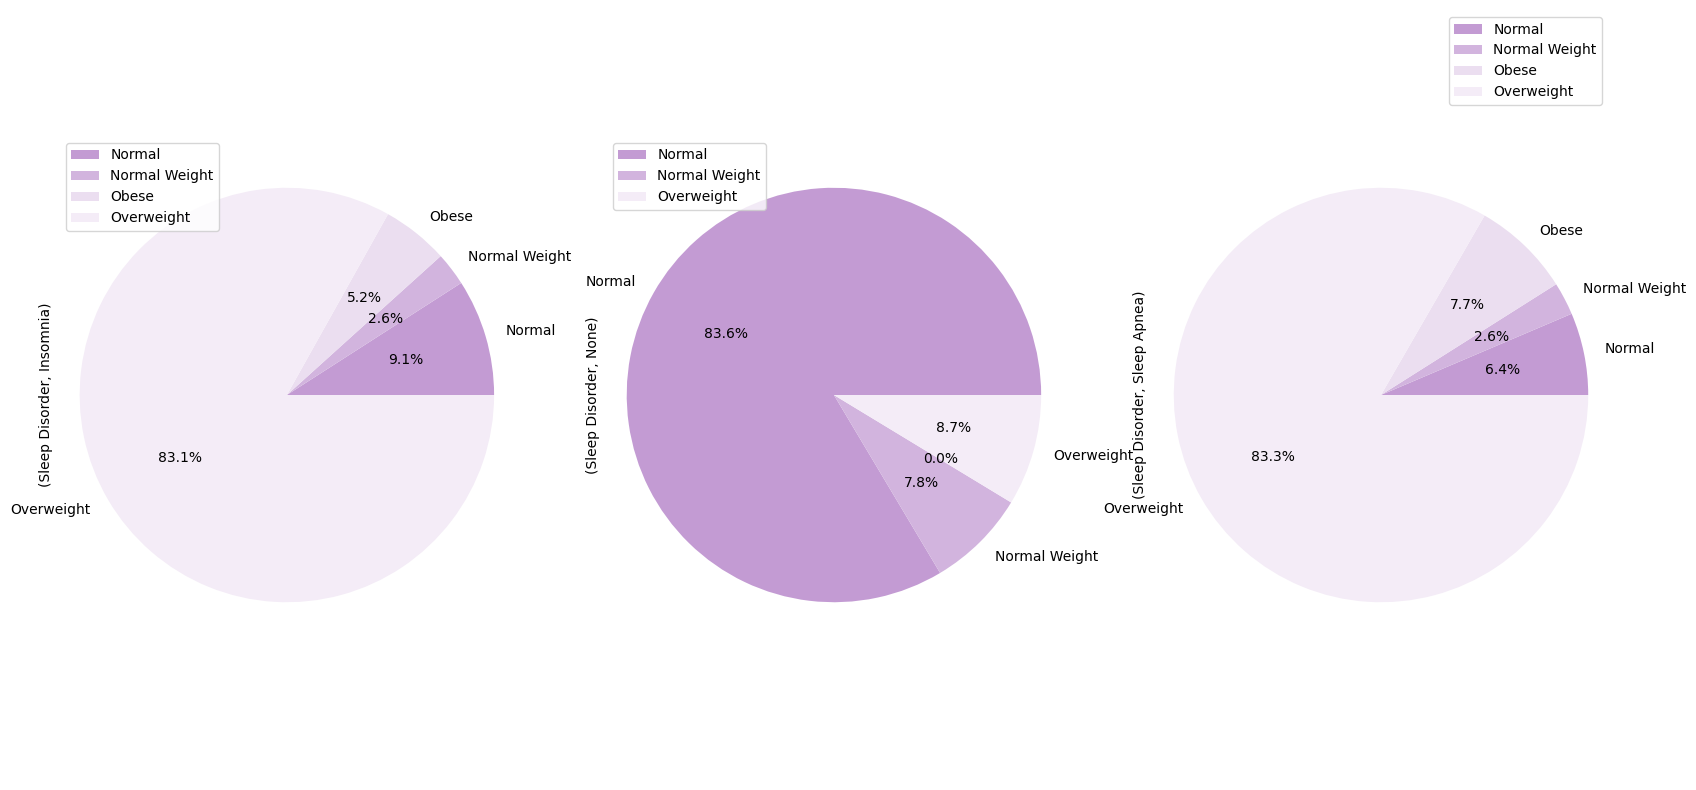

In [66]:
data.pivot_table(index='BMI Category',columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}
                ).plot.pie(autopct ='%1.1f%%',subplots=True,figsize=(20,10),colors=['#C39BD3','#D2B4DE','#EBDEF0','#F4ECF7'])

plt.axis('equal')
plt.show()

## Data preprocessing

In [67]:
data.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

<Axes: >

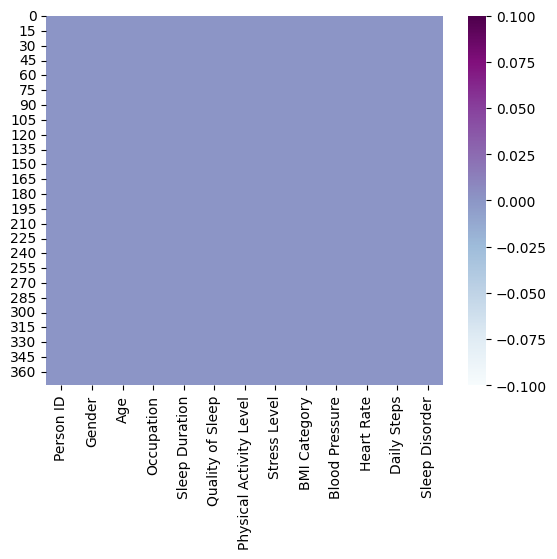

In [68]:
sns.heatmap(data.isna(),cmap='BuPu')

In [71]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [74]:
data['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

- Ideal blood pressure :　less than 120 ,　less than 80
- Normal blood pressure is between **(120 - 129) ,   (80 - 84)**

In [75]:
# 0 = normal, 1 = abnormal
data['Blood Pressure'] = data['Blood Pressure'].apply(
    lambda x : 0 if x in ['120/80','126/83','125/80','128/84','129/84','117/76','118/76','115/75','125/82','122/80'] 
    else 1)

In [76]:
data["Age"] = pd.cut(data["Age"],2)
data["Heart Rate"] = pd.cut(data["Heart Rate"],4)
data["Daily Steps"] = pd.cut(data["Daily Steps"],4)
data["Sleep Duration"] = pd.cut(data["Sleep Duration"],3)
data["Physical Activity Level"] = pd.cut(data["Physical Activity Level"],4)

In [78]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

categories = ['Gender','Age','Occupation','Sleep Duration','Physical Activity Level','BMI Category','Heart Rate','Daily Steps','Sleep Disorder']
for label in categories:
    data[label] = LE.fit_transform(data[label])

In [79]:
data.drop(['Person ID'], axis=1, inplace=True)

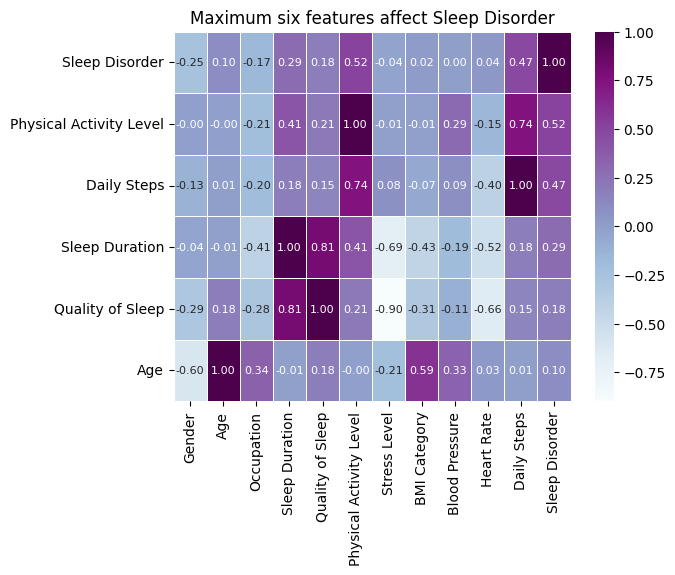

In [80]:
correlation = data.corr()
max_6_corr = correlation.nlargest(6,"Sleep Disorder")
sns.heatmap(max_6_corr,annot=True,fmt=".2F",annot_kws={"size":8},linewidths=0.5,cmap='BuPu')
plt.title('Maximum six features affect Sleep Disorder')
plt.show()

In [86]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

print(x.shape)
print(y.shape)

(374, 11)
(374,)


In [122]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=32,shuffle=True)  #shuffle:隨機取樣

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(261, 11)
(113, 11)
(261,)
(113,)


## Data modeling 
### LogisticRegression

In [123]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression().fit(x_train,y_train)

print(round(LR.score(x_train,y_train)*100,2))
print(round(LR.score(x_test,y_test)*100,2))

91.19
91.15


In [124]:
LR_y_pred = LR.predict(x_test)

### XGBClassifier Model

In [125]:
from xgboost import XGBClassifier

xgb = XGBClassifier().fit(x_train,y_train)

print(round(xgb.score(x_train,y_train)*100,2))
print(round(xgb.score(x_test,y_test)*100,2))

93.49
90.27


In [126]:
xgb_y_pred=xgb.predict(x_test)

### CatBoostClassifier Model

In [127]:
from catboost import CatBoostClassifier

CBC = CatBoostClassifier(verbose=False).fit(x_train,y_train)

print(round(CBC.score(x_train,y_train)*100,2))
print(round(CBC.score(x_test,y_test)*100,2))

93.49
90.27


In [128]:
CBC_y_pred=CBC.predict(x_test)

### GradientBoostingClassifier Model

In [129]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier().fit(x_train,y_train)

print(round(GBC.score(x_train,y_train)*100,2))
print(round(GBC.score(x_test,y_test)*100,2))

93.49
90.27


In [130]:
GBC_y_pred=GBC.predict(x_test)

### SVC Model

In [131]:
from sklearn.svm import SVC

svc = SVC().fit(x_train,y_train)

print(round(svc.score(x_train,y_train)*100,2))
print(round(svc.score(x_test,y_test)*100,2))

89.27
86.73


In [132]:
svc_y_pred=svc.predict(x_test)

## Models evaluation

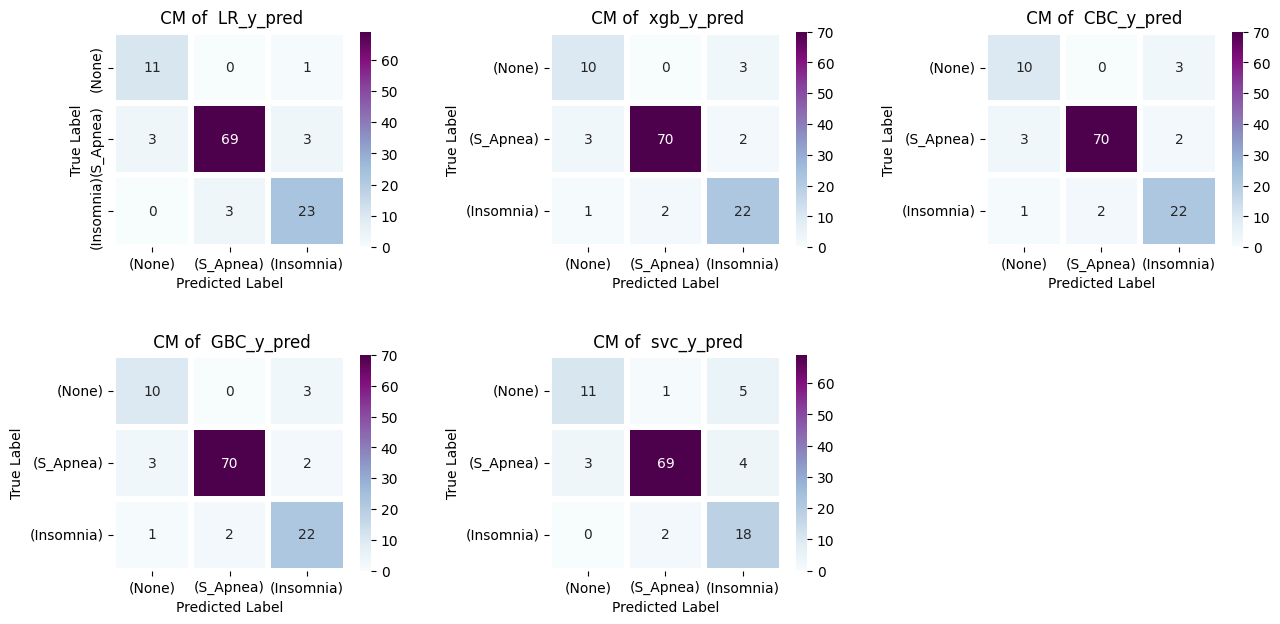

In [140]:
from sklearn.metrics import confusion_matrix

models_predictions = [LR_y_pred,xgb_y_pred,CBC_y_pred,GBC_y_pred,svc_y_pred]
model = {1:'LR_y_pred',2:'xgb_y_pred',3:'CBC_y_pred',4:'GBC_y_pred',5:'svc_y_pred'}


plt.figure(figsize=(15,7))
for i, y_pred in enumerate(models_predictions,1) :
    
    cm = confusion_matrix(y_pred,y_test)
    
    plt.subplot(2,3,i)
    sns.heatmap(cm,cmap='BuPu',linewidth=3,fmt='',annot=True,
                xticklabels=['(None)','(S_Apnea)','(Insomnia)'],
                yticklabels=['(None)','(S_Apnea)','(Insomnia)'])
    
    
    plt.title(' CM of  '+ model[i])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)

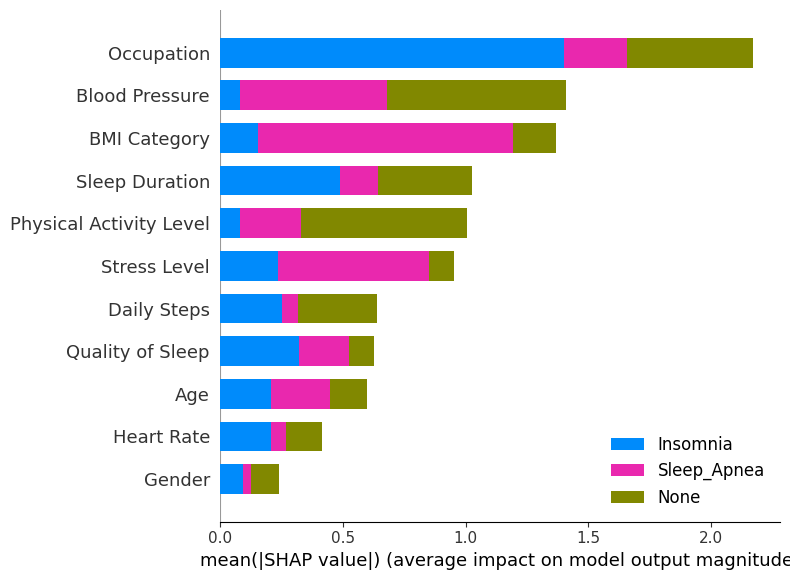

In [141]:
import shap

shap_values = shap.TreeExplainer(xgb).shap_values(x_test)
shap.summary_plot(shap_values, x_test,class_names=['None','Sleep_Apnea','Insomnia'])